# NiBabel Tutorial

A nibabel (and nipy) image is the association of three things:

- The image data array: a 3D or 4D array of image data
- An affine array that tells you the position of the image array data in a reference space.
- image metadata (data about the data) describing the image, usually in the form of an image header.

In [2]:
import os
import numpy as np
import nibabel as nib

#### Read image from file

In [3]:
img = nib.load('../NeuroNexus/Calgary_PS_DTI_Dataset/10001/PS14_006/b750/PS14_006_750.nii')

In [4]:
img.shape

(256, 256, 54, 35)

In [65]:
img

This is an array proxy, not the actual image array. This allows creating image object without immediately loading all the array data from disk. dataobj is the object point to the image array data:

In [69]:
img.dataobj

In [70]:
nib.is_proxy(img.dataobj)

True

Use the get_fdata() to fetch the array data from disk using the proxy:

In [73]:
img_data = img.get_fdata()

In [74]:
img_data.shape

(256, 256, 54, 35)

Note: repeated calls to get_fdata() returns cached copy of the loaded array, it does not load from disk after the first time.
You can uncache a proxy image with uncache() method:

In [77]:
img.in_memory

True

In [78]:
img.uncache()
img.in_memory

False

To avoid caching, you can use: np.asarray(img.dataobj)

#### Slicing on proxy

Loading a slice of the data:

In [86]:
img = nib.load('../NeuroNexus/Calgary_PS_DTI_Dataset/10001/PS14_006/b750/PS14_006_750.nii')
data = img.get_fdata()
data.shape

(256, 256, 54, 35)

In [87]:
vol_1 = data[...,1]
vol_1.shape

(256, 256, 54)

Alternatively, slicing on the proxy avoids loading the entire data and is more efficient:

In [5]:
vol_1 = img.dataobj[...,1]
vol_1.shape

(256, 256, 54)

#### NiBabel image is stored as 16 bit signed integers

In [66]:
img.get_data_dtype() == np.dtype(np.int16)

True

#### NiBabel image's affine transformation

In [67]:
img.affine

array([[-7.81300008e-01,  0.00000000e+00,  0.00000000e+00,
         9.58841019e+01],
       [ 0.00000000e+00,  7.78607666e-01, -1.82484865e-01,
        -6.84739532e+01],
       [ 0.00000000e+00,  6.48057088e-02,  2.19246292e+00,
        -2.19001064e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

#### Convert to a Numpy array if needed

In [25]:
data = img.get_fdata()
data.shape

(256, 256, 54, 35)

#### Image header

In [31]:
hdr = img.header
hdr.get_xyzt_units()

('mm', 'sec')

In [53]:
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:6750.000 TE:81'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 256 256  54  35   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.0000000e+00  7.8130001e-01  7.8130001e-01  2.2000442e+00
  6.7500000e+00  1.0000000e+00  1.0000000e+00  5.1158000e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.9991381
quatern_d       : 0.

There are two types of NIfTI formats: NIfTI1 and NIfTI2 and they have different fields:
    - NIfTI1 header sizeof_hdr is 348
    - NifTI2 header sizeof_hdr is 540

The header attribute can be accessed and modified like a dict:

In [91]:
hdr['cal_max']

array(0., dtype=float32)

#### Voxel sizes in millimeters

In [57]:
hdr.get_zooms()

(0.7813, 0.7813, 2.2000442, 6.75)

The last value of header.get_zooms() is the time between scans in milliseconds; this is the equivalent of voxel size on the time axis.

#### Low level API

In [19]:
type(data)

numpy.ndarray

In [32]:
raw = hdr.structarr
raw['xyzt_units']

array(10, dtype=uint8)

#### Create image

In [59]:
array_data = np.arange(24, dtype=np.int16).reshape((2, 3, 4))
affine = np.diag([1, 2, 3, 1])
img = nib.Nifti1Image(array_data, affine)

In [62]:
img.dataobj

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]], dtype=int16)

#### Save image to file

In [61]:
img.to_filename(os.path.join('temp_dir', 'my_test_image.nii'))

#### Display image

In [14]:
import matplotlib.pyplot as plt

In [23]:
def show_slices(slices):
    """Display row of image slices"""
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap='gray', origin='lower')

In [24]:
img = nib.load('../NeuroNexus/Calgary_PS_DTI_Dataset/10001/PS14_006/b750/PS14_006_750.nii')
vol_1 = img.dataobj[...,1]
vol_1.shape

(256, 256, 54)

In [25]:
slice_0 = vol_1[26,:,:]
slice_1 = vol_1[:,30,:]
slice_2 = vol_1[:,:,16]

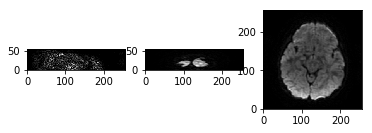

In [26]:
show_slices([slice_0,slice_1,slice_2])